<a href="https://colab.research.google.com/github/PeterPirog/tensorflow-deep-learning/blob/workspace/01_regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install feature-engine

In [2]:
# Tensorflow
import tensorflow as tf
tf.random.set_seed(42)

#Feature engine
from feature_engine.encoding import MeanEncoder
from feature_engine.wrappers import SklearnTransformerWrapper

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [3]:
df=pd.pandas.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Prepare X and y values
X=df.drop('charges',axis=1)
y=df['charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [6]:
pipe = Pipeline([
                 #https://feature-engine.readthedocs.io/en/1.1.x/encoding/MeanEncoder.html
                 ('MeanEncoder', MeanEncoder(variables=['sex', 'smoker', 'region'])),
                 ('Scaler',SklearnTransformerWrapper(transformer = StandardScaler(),
                                                     variables = None))
                 ])

In [7]:
X_train_enc=pipe.fit_transform(X_train, y_train)
X_test_enc=pipe.transform(X_test)
X_train_enc.head()

,age,sex,bmi,children,smoker,region
560,0.472227,-1.024602,-1.756525,0.734336,-0.508747,-0.839999
1285,0.543313,-1.024602,-1.033082,-0.911192,-0.508747,-0.015186
1142,0.898745,-1.024602,-0.943687,-0.911192,-0.508747,1.569715
969,-0.025379,-1.024602,0.622393,3.202629,-0.508747,1.569715
486,1.040918,-1.024602,-1.504893,1.557100,-0.508747,-0.839999


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0322fe4210>,
      dtype=object)

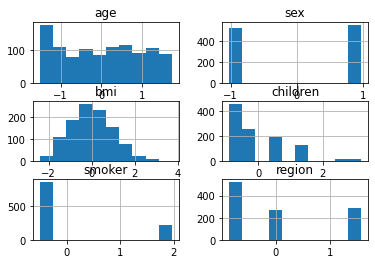

In [8]:
X_train_enc.hist(bins=10)

In [9]:
# 1. Create model
N=30
model=tf.keras.Sequential(name='Model1')
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(N,activation=tf.keras.activations.elu, name='Dense1'))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(N,activation=tf.keras.activations.elu,name='Dense2'))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.elu,name='Output'))

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [10]:
callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.5,
                                                patience=5),
           tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10)
           
]

In [11]:
from sklearn.utils import shuffle
#3. Model fit
history=model.fit(X_train_enc,y_train,epochs=1000,
          validation_split=0.1,
          shuffle=True,
          callbacks=callbacks)
#model.summary()

Epoch 1/1000
31/31 [==============================] - 1s 10ms/step - loss: 13456.4570 - mae: 13456.4570 - val_loss: 12248.2510 - val_mae: 12248.2510 - lr: 0.0100
Epoch 2/1000
31/31 [==============================] - 0s 3ms/step - loss: 13352.6104 - mae: 13352.6104 - val_loss: 12002.1055 - val_mae: 12002.1055 - lr: 0.0100
Epoch 3/1000
31/31 [==============================] - 0s 3ms/step - loss: 12882.0352 - mae: 12882.0352 - val_loss: 11144.5244 - val_mae: 11144.5244 - lr: 0.0100
Epoch 4/1000
31/31 [==============================] - 0s 3ms/step - loss: 11659.9980 - mae: 11659.9980 - val_loss: 9445.4473 - val_mae: 9445.4473 - lr: 0.0100
Epoch 5/1000
31/31 [==============================] - 0s 3ms/step - loss: 9592.4990 - mae: 9592.4990 - val_loss: 7225.3872 - val_mae: 7225.3872 - lr: 0.0100
Epoch 6/1000
31/31 [==============================] - 0s 3ms/step - loss: 8202.9180 - mae: 8202.9180 - val_loss: 6922.5083 - val_mae: 6922.5083 - lr: 0.0100
Epoch 7/1000
31/31 [=======================

In [12]:
print(history.history.keys())
#pd.DataFrame(history.history).plot()
#plt.ylabel("loss")
#plt.xlabel("epochs")
acc=history.history['mae']
val_acc=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])


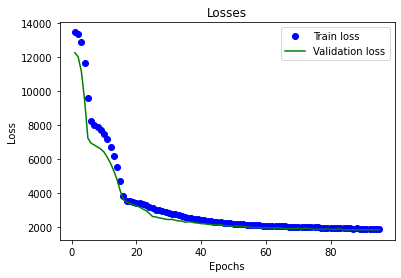

In [13]:
plt.plot(epochs,loss,'bo',label='Train loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [14]:
model.evaluate(X_test_enc,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1699.8396 - mae: 1699.8396


[1699.839599609375, 1699.839599609375]

In [15]:
#plt.scatter(X,y)
#plt.show

### Prepare 3 sets

* train -70-80 %
* val 10-15 %
* test 10-15 %


In [16]:
### How many samples we have
#print(len(X))

In [17]:
def split_dataset(X,y,val_size=0.2,test_size=0.1,shuffle=True,random_state=42):
  N=len(X)
  train_size=1.0-test_size-val_size
  N_train=N*train_size
  N_val=N*val_size
  N_test=N*test_size

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state,shuffle=shuffle)
  
  corrected_val_size=N_val/(N_val+N_train) # corrected value is scaled cause of the first split

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=corrected_val_size, random_state=random_state,shuffle=shuffle)

  return X_train,X_val, X_test, y_train, y_val, y_test


In [18]:
def plot_predictions(X_test=X_test,y_test=y_test, y_pred=y_pred):
  plt.figure(figsize=(10,7))


  # Plot training data in blue
  plt.scatter(X_test,y_test,c='g',label='Test data')

  # Plot training data in blue
  plt.scatter(X_test,y_pred,c='r',label='Predicted data')
  plt.legend();

NameError: ignored

In [ ]:
"""
X_train,X_val, X_test, y_train, y_val, y_test=split_dataset(X,y,val_size=0.2,test_size=0.1,shuffle=True,random_state=42)
print(len(X_train))
print(len(X_val))
print(len(X_test))
"""

In [ ]:
"""
# Visualise the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train,c='b', label="Training data")
plt.scatter(X_test, y_test,c='r', label="Testing data")
# Show a legend
plt.legend()
"""

In [ ]:
"""
model=tf.keras.Sequential(name='Model1')
model.add(tf.keras.layers.Dense(5,input_shape=[1],name='Dense1'))
model.add(tf.keras.layers.Dense(1,name='Output'))
model.summary()
"""

In [ ]:
"""
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)
"""

In [ ]:
"""
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])
"""

In [ ]:
"""
model.fit(x=X_train,y=y_train,
          batch_size=None,
          epochs=100)
"""

In [ ]:
y_pred=model.predict(x=X_test)

In [ ]:
plot_predictions(X_test=X_test,y_test=y_test, y_pred=y_pred)

In [ ]:
# evaluate model
model.evaluate(X_test,y_test)